In [1]:
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import ultralytics
from PIL import Image
import random
import torch


In [2]:
ultralytics.checks()

Ultralytics YOLOv8.2.98 🚀 Python-3.10.14 torch-2.4.1+cu121 CPU (Intel Core(TM) i7-6700HQ 2.60GHz)
Setup complete ✅ (8 CPUs, 23.4 GB RAM, 107.3/121.0 GB disk)


In [3]:
print("GPU available:", torch.cuda.is_available())

GPU available: False


# Preprocesamiento de datos

In [4]:
root_path = "datasets/archive/rsud20k"

In [5]:
train_image = [image for image in os.listdir(f"{root_path}/images/train")]

In [6]:
train_image_number = len(train_image)

In [7]:
print(f"El número total de imágenes de entrenamiento es: {train_image_number}")

El número total de imágenes de entrenamiento es: 18681


In [8]:

def show_img_matrix(image_list, show_axis=False):
  max_size = 9
  if len(image_list) != max_size:
    return

  plt.figure(figsize=(10, 10))

  for i in range(max_size):
    img_file = image_list[i]
    img_name = os.path.basename(img_file)
    ax = plt.subplot(3, 3, i + 1)
    if os.path.exists(img_file) == True:
      plt.imshow(np.asarray(Image.open(img_file)))
      img = mpimg.imread(img_file)
    #Como los nombres son muy extensos, vamos a truncar a 20 caracteres.
    plt.title(img_name[:20])
    plt.axis("on" if show_axis == True else "on")

  plt.tight_layout()
  plt.show()

In [9]:
image_path = f"{root_path}/images"

train_images_path = f"{image_path}/train"
val_images_path = f"{image_path}/val"
test_images_path = f"{image_path}/test"

In [10]:
image_path = [os.path.join(train_images_path, image) for image in train_image]

In [11]:
image_path

['datasets/archive/rsud20k/images/train/train13651.jpg',
 'datasets/archive/rsud20k/images/train/train18270.jpg',
 'datasets/archive/rsud20k/images/train/train757.jpg',
 'datasets/archive/rsud20k/images/train/train16019.jpg',
 'datasets/archive/rsud20k/images/train/train17309.jpg',
 'datasets/archive/rsud20k/images/train/train15782.jpg',
 'datasets/archive/rsud20k/images/train/train563.jpg',
 'datasets/archive/rsud20k/images/train/train2082.jpg',
 'datasets/archive/rsud20k/images/train/train16340.jpg',
 'datasets/archive/rsud20k/images/train/train7709.jpg',
 'datasets/archive/rsud20k/images/train/train3656.jpg',
 'datasets/archive/rsud20k/images/train/train12022.jpg',
 'datasets/archive/rsud20k/images/train/train2543.jpg',
 'datasets/archive/rsud20k/images/train/train9356.jpg',
 'datasets/archive/rsud20k/images/train/train10621.jpg',
 'datasets/archive/rsud20k/images/train/train2448.jpg',
 'datasets/archive/rsud20k/images/train/train4445.jpg',
 'datasets/archive/rsud20k/images/train/tr

In [12]:
image_path[0:9]

['datasets/archive/rsud20k/images/train/train13651.jpg',
 'datasets/archive/rsud20k/images/train/train18270.jpg',
 'datasets/archive/rsud20k/images/train/train757.jpg',
 'datasets/archive/rsud20k/images/train/train16019.jpg',
 'datasets/archive/rsud20k/images/train/train17309.jpg',
 'datasets/archive/rsud20k/images/train/train15782.jpg',
 'datasets/archive/rsud20k/images/train/train563.jpg',
 'datasets/archive/rsud20k/images/train/train2082.jpg',
 'datasets/archive/rsud20k/images/train/train16340.jpg']

## Muestra de los datos

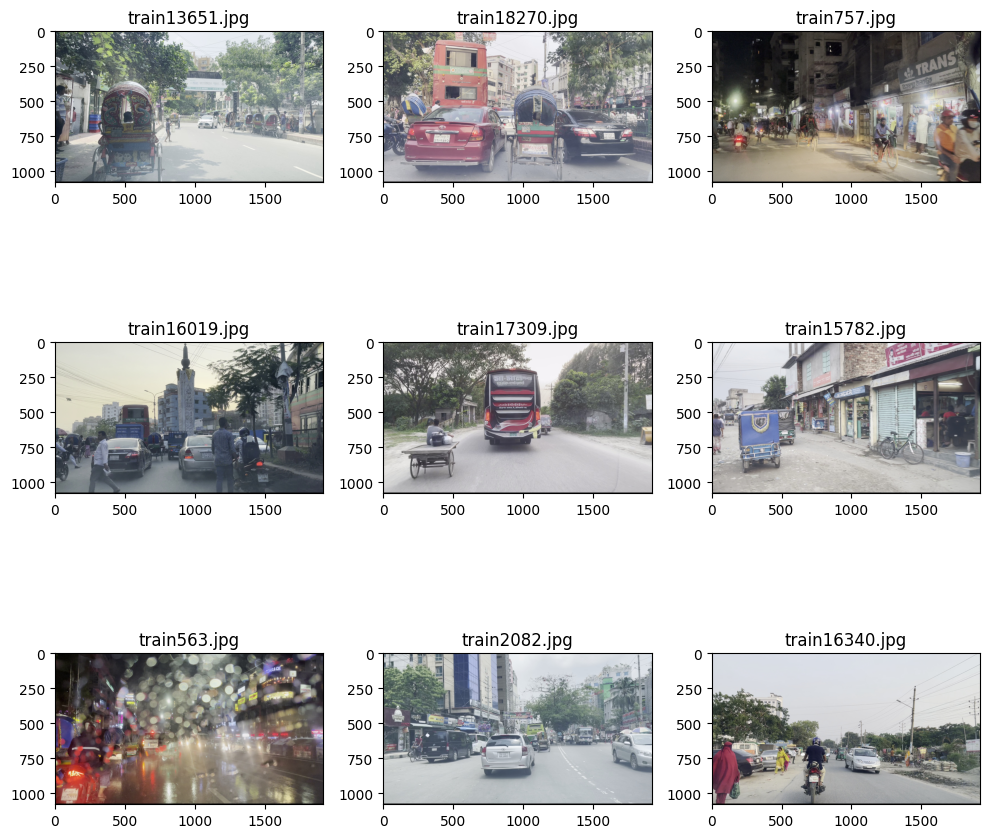

In [13]:
show_img_matrix(image_path[0:9], show_axis=True)

In [20]:


class_names = [
    "person",
    "rickshaw",
    "rickshaw van",
    "auto rickshaw",
    "truck",
    "pickup truck",
    "private car",
    "motorcycle",
    "bicycle",
    "bus",
    "micro bus",
    "covered van",
    "human hauler"
]

In [38]:
root_path = "archive/rsud20k"

In [44]:
yml_content = f"""\
path: {root_path}   # Directorio raiz de los datos
train: images/{os.path.basename(train_images_path)}  # Ruta relativa a los datos de entrenamiento
val: images/{os.path.basename(val_images_path)}  # Ruta relativa a los datos de validacion
test: images/{os.path.basename(train_images_path)} # Ruta relativa a los datos de prueba

# Classes
nc: {len(class_names)}

names: {class_names}
"""

In [37]:
os.path.basename(train_images_path)

'train'

In [7]:
yml_path = f"datasets/archive/rsud20k/rsud20k.yaml"

In [46]:
root_path

'archive/rsud20k'

In [47]:

if os.path.exists(yml_path):
  os.remove(yml_path)

# Guardar el archivo YAML
with open(yml_path, 'w') as yaml_file:
  yaml_file.write(yml_content)

# Entrenamiento del modelo

In [8]:
model = ultralytics.YOLO('yolov8n.yaml')
model = ultralytics.YOLO('yolov8n.pt')

In [25]:
img_size = 128

In [67]:
model.train(data=yml_path, epochs=10, imgsz=img_size, batch=1000, patience=2, name="train")

New https://pypi.org/project/ultralytics/8.3.7 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.98 🚀 Python-3.10.14 torch-2.4.1+cu121 CPU (Intel Core(TM) i7-6700HQ 2.60GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets/archive/rsud20k/rsud20k.yaml, epochs=10, time=None, patience=2, batch=1000, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=No

train: Scanning /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/labels/train.cache... 18681 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18681/18681 [00:00<?, ?it/s]
/home/emil/anaconda3/envs/deep_learning/lib/python3.10/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
val: Scanning /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/labels/val.cache... 1004 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1004/1004 [00:00<?, ?it/s]

Plotting labels to runs/detect/train10/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0078125), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 128 train, 128 val
Using 0 dataloader workers
Logging results to runs/detect/train10
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.238     0.8642     0.8999       3772        128: 100%|██████████| 19/19 [09:13<00:00, 29.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:19<00:00, 19.57s/it]

                   all       1004       7385      0.376      0.247      0.241      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G       1.22     0.8463     0.8965       3924        128: 100%|██████████| 19/19 [08:42<00:00, 27.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:19<00:00, 19.59s/it]

                   all       1004       7385      0.415      0.236      0.247      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.197     0.8274     0.8903       3786        128: 100%|██████████| 19/19 [08:39<00:00, 27.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:19<00:00, 19.59s/it]

                   all       1004       7385      0.446      0.237      0.247      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.174     0.8042     0.8866       3970        128: 100%|██████████| 19/19 [08:48<00:00, 27.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.25s/it]

                   all       1004       7385      0.413      0.244      0.246      0.155
EarlyStopping: Training stopped early as no improvement observed in last 2 epochs. Best results observed at epoch 2, best model saved as best.pt.
To update EarlyStopping(patience=2) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



4 epochs completed in 0.613 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 6.2MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics YOLOv8.2.98 🚀 Python-3.10.14 torch-2.4.1+cu121 CPU (Intel Core(TM) i7-6700HQ 2.60GHz)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.77s/it]


                   all       1004       7385      0.415      0.236      0.247      0.158
                person        566       1917      0.475      0.131      0.151     0.0585
              rickshaw        648       1587      0.509      0.354      0.388      0.237
          rickshaw van        160        240      0.166       0.15      0.104     0.0224
         auto rickshaw        388        590      0.605      0.351      0.417       0.27
                 truck         62         65      0.422      0.348       0.28      0.227
          pickup truck         66         74      0.117     0.0811      0.083     0.0408
           private car        776       1420      0.655      0.435      0.484      0.311
            motorcycle        550        860       0.54      0.314      0.328      0.179
               bicycle        135        146      0.114     0.0342     0.0253    0.00697
                   bus        169        182      0.501      0.231      0.262      0.173
             micro bu

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x791624ddfac0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

In [9]:
model.train(data=yml_path, epochs=10, imgsz=128, batch=800, patience=2, name="train")

New https://pypi.org/project/ultralytics/8.3.8 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.98 🚀 Python-3.10.14 torch-2.4.1+cu121 CPU (Intel Core(TM) i7-6700HQ 2.60GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets/archive/rsud20k/rsud20k.yaml, epochs=10, time=None, patience=2, batch=800, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train21, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

train: Scanning /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/labels/train.cache... 18681 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18681/18681 [00:00<?, ?it/s]
/home/emil/anaconda3/envs/deep_learning/lib/python3.10/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
val: Scanning /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/labels/val.cache... 1004 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1004/1004 [00:00<?, ?it/s]


Plotting labels to runs/detect/train21/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00625), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 128 train, 128 val
Using 0 dataloader workers
Logging results to runs/detect/train21
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.104      4.534      1.243       1554        128: 100%|██████████| 24/24 [08:37<00:00, 21.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.70s/it]

                   all       1004       7385    0.00959      0.132     0.0144    0.00582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      2.001      3.219      1.033       1573        128: 100%|██████████| 24/24 [08:06<00:00, 20.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.55s/it]

                   all       1004       7385     0.0251      0.245     0.0655     0.0355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.833      2.136     0.9952       1523        128: 100%|██████████| 24/24 [08:05<00:00, 20.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.76s/it]

                   all       1004       7385      0.733     0.0614      0.106     0.0631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.639       1.61     0.9656       1671        128: 100%|██████████| 24/24 [08:05<00:00, 20.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.58s/it]

                   all       1004       7385      0.674      0.139       0.14     0.0863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G       1.53      1.362     0.9483       1513        128: 100%|██████████| 24/24 [08:05<00:00, 20.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.09s/it]

                   all       1004       7385      0.533      0.144      0.158      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.456      1.235     0.9359       1604        128: 100%|██████████| 24/24 [08:04<00:00, 20.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.69s/it]

                   all       1004       7385      0.472      0.153      0.176      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.407      1.156     0.9278       1703        128: 100%|██████████| 24/24 [08:05<00:00, 20.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.71s/it]

                   all       1004       7385      0.481      0.156      0.177      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.374      1.113      0.922       1549        128: 100%|██████████| 24/24 [09:56<00:00, 24.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.96s/it]

                   all       1004       7385      0.321      0.179      0.186      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.346      1.076     0.9152       1550        128: 100%|██████████| 24/24 [08:07<00:00, 20.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.74s/it]

                   all       1004       7385      0.381      0.181      0.196      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.327      1.054     0.9127       1597        128: 100%|██████████| 24/24 [08:10<00:00, 20.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.53s/it]

                   all       1004       7385      0.386      0.187      0.203      0.131



10 epochs completed in 1.442 hours.
Optimizer stripped from runs/detect/train21/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train21/weights/best.pt, 6.2MB

Validating runs/detect/train21/weights/best.pt...
Ultralytics YOLOv8.2.98 🚀 Python-3.10.14 torch-2.4.1+cu121 CPU (Intel Core(TM) i7-6700HQ 2.60GHz)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.14s/it]


                   all       1004       7385      0.381      0.189      0.203      0.131
                person        566       1917       0.39      0.123      0.122     0.0483
              rickshaw        648       1587      0.366      0.391      0.355      0.211
          rickshaw van        160        240      0.192     0.0167     0.0296    0.00657
         auto rickshaw        388        590      0.507      0.288      0.327      0.214
                 truck         62         65      0.455      0.292      0.294      0.257
          pickup truck         66         74      0.103     0.0173     0.0823     0.0276
           private car        776       1420      0.588      0.414      0.451      0.282
            motorcycle        550        860      0.319      0.319      0.271      0.134
               bicycle        135        146          0          0    0.00917     0.0025
                   bus        169        182      0.474      0.291      0.264      0.176
             micro bu

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x796be077f040>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

# Análisis de predicciones

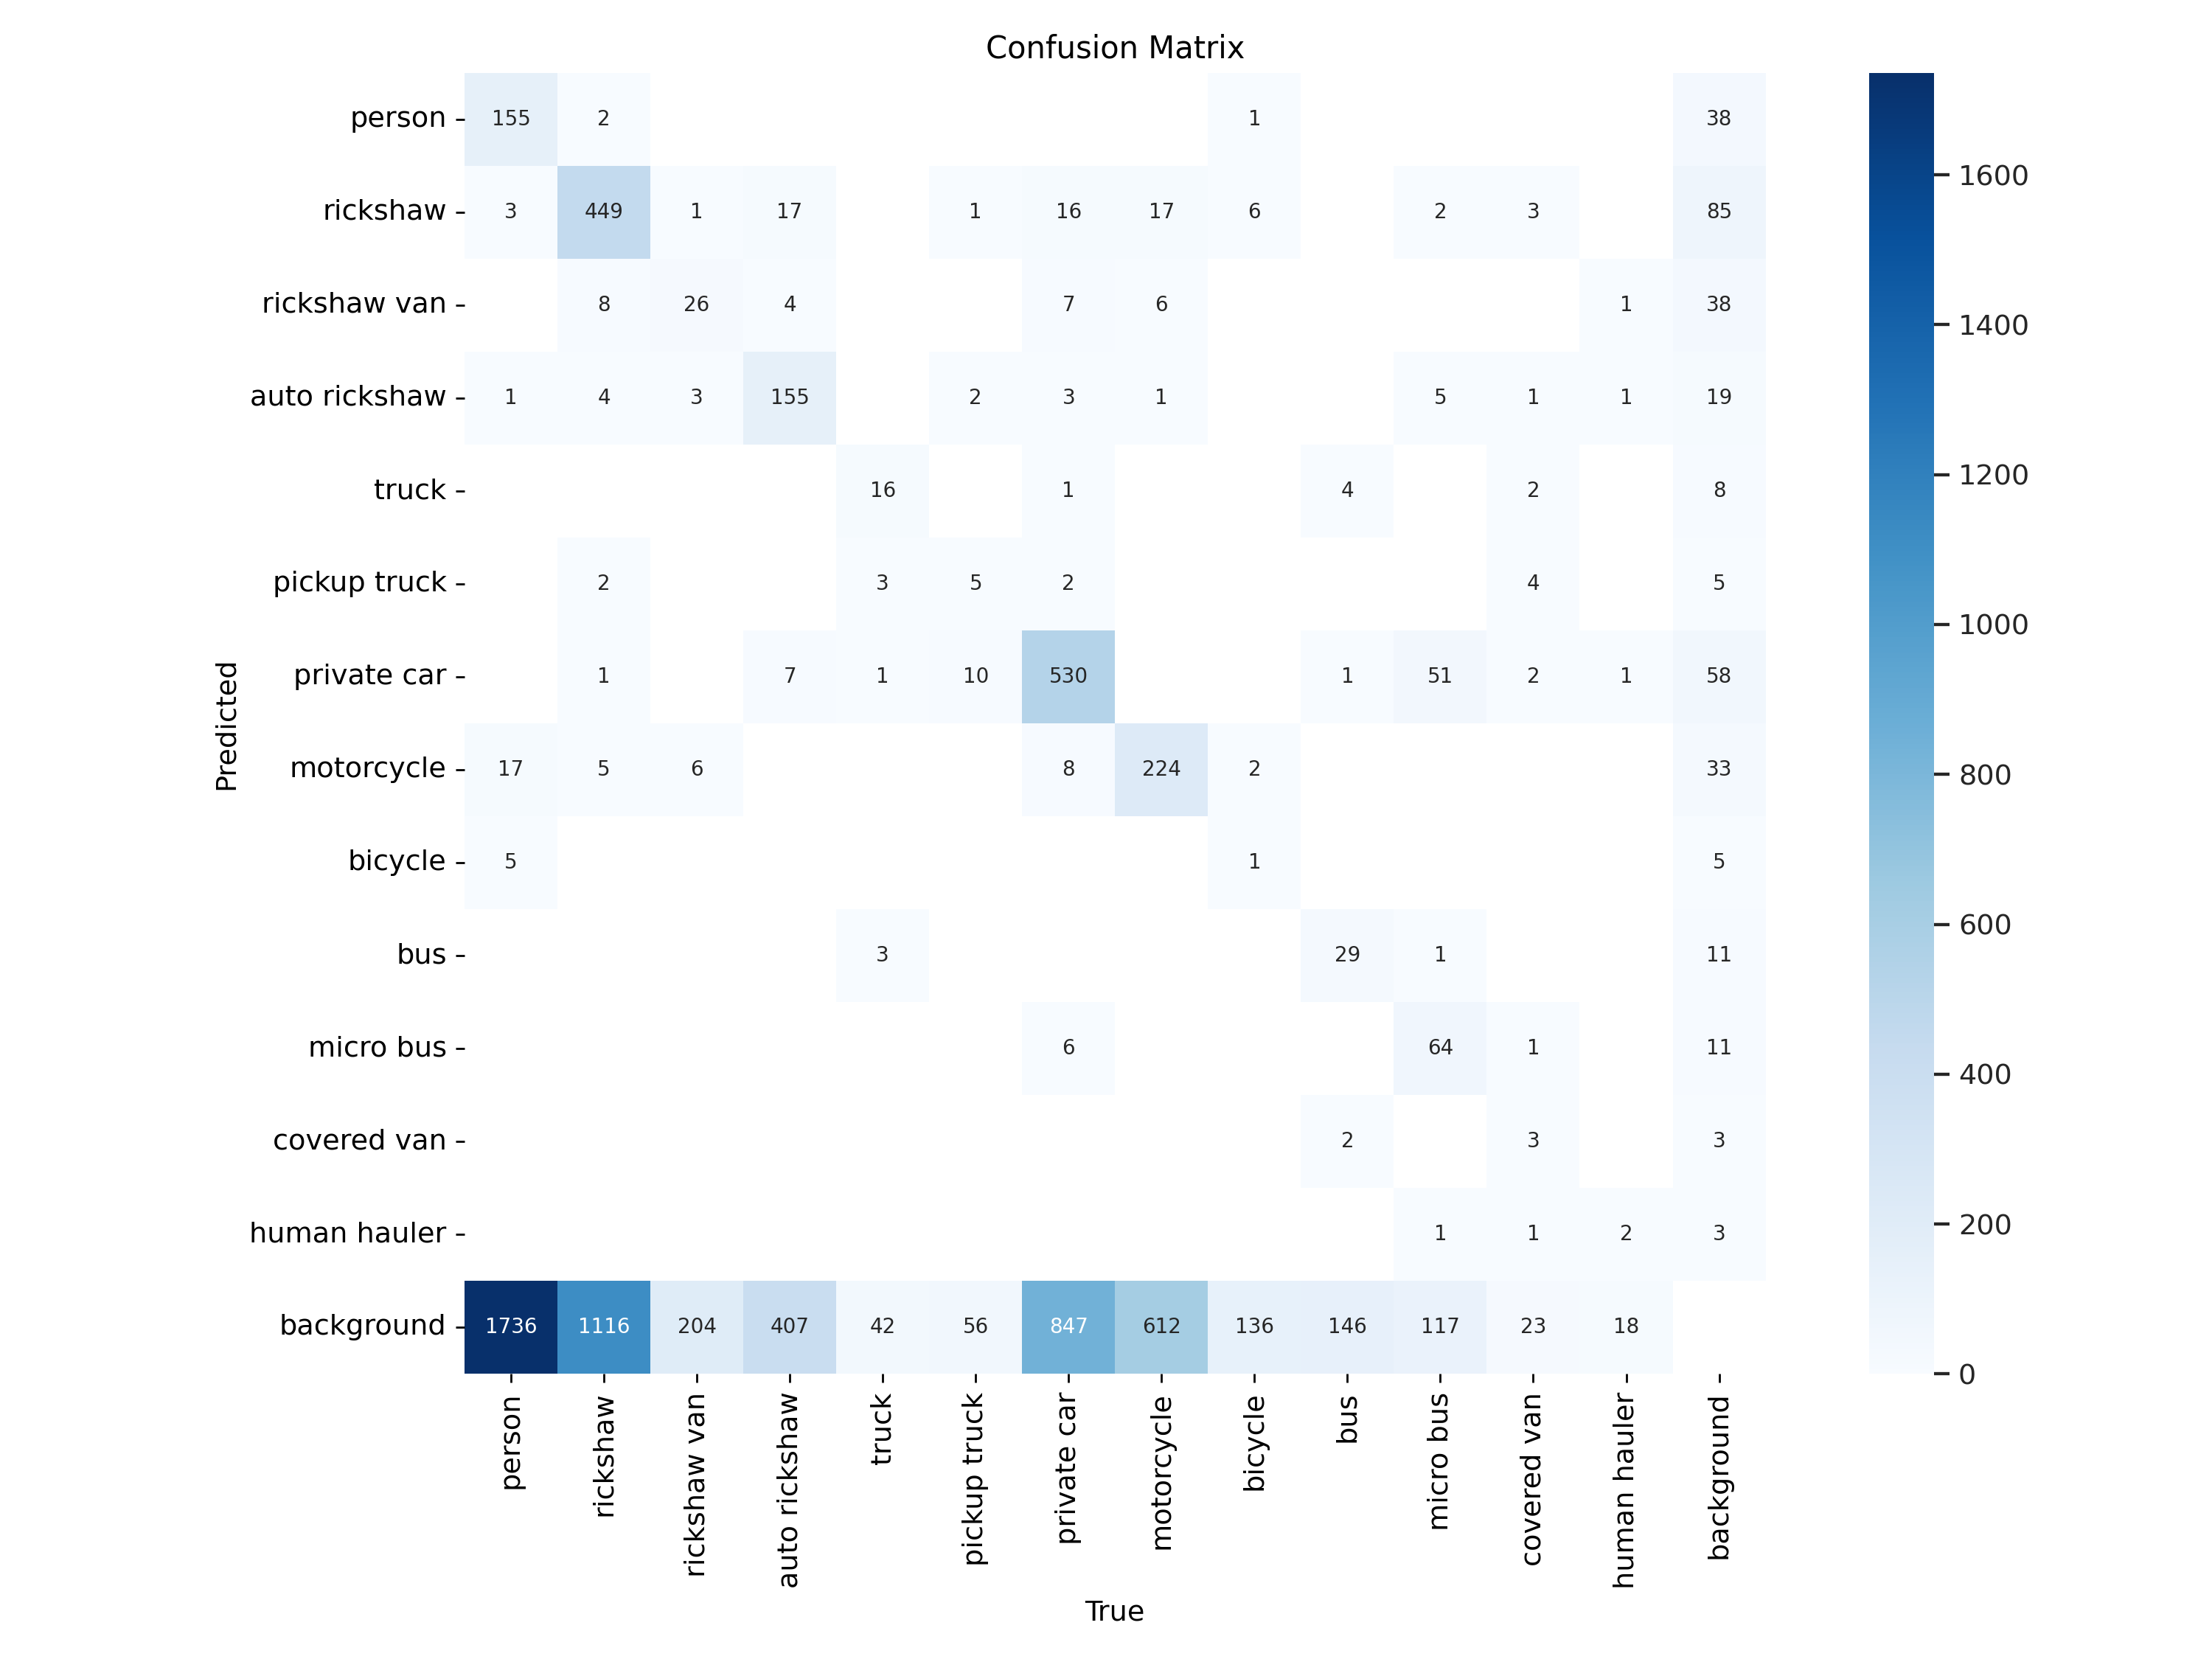

In [5]:
Image.open("runs/detect/train10/confusion_matrix.png")

## Validation set

In [73]:
results = model.val(data=yml_path, imgsz=img_size, name="val")

Ultralytics YOLOv8.2.98 🚀 Python-3.10.14 torch-2.4.1+cu121 CPU (Intel Core(TM) i7-6700HQ 2.60GHz)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/labels/val.cache... 1004 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1004/1004 [00:00<?, ?it/s]
/home/emil/anaconda3/envs/deep_learning/lib/python3.10/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.44s/it]


                   all       1004       7385      0.415      0.236      0.247      0.158
                person        566       1917      0.475      0.131      0.151     0.0585
              rickshaw        648       1587      0.509      0.354      0.388      0.237
          rickshaw van        160        240      0.166       0.15      0.104     0.0224
         auto rickshaw        388        590      0.605      0.351      0.417       0.27
                 truck         62         65      0.422      0.348       0.28      0.227
          pickup truck         66         74      0.117     0.0811      0.083     0.0408
           private car        776       1420      0.655      0.435      0.484      0.311
            motorcycle        550        860       0.54      0.314      0.328      0.179
               bicycle        135        146      0.114     0.0342     0.0253    0.00697
                   bus        169        182      0.501      0.231      0.262      0.173
             micro bu

# Predicciones

In [15]:
results = model.predict(source=test_images_path, conf=0.25, save=True, imgsz=128, name="predict")


image 1/649 /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/images/test/test0.jpg: 96x128 1 private car, 1 bus, 23.9ms
image 2/649 /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/images/test/test1.jpg: 96x128 1 truck, 2 motorcycles, 1 bus, 10.0ms
image 3/649 /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/images/test/test10.jpg: 96x128 1 rickshaw, 1 motorcycle, 13.2ms
image 4/649 /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/images/test/test100.jpg: 96x128 1 private car, 12.2ms
image 5/649 /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/images/test/test101.jpg: 96x128 (no detections), 11.9ms
image 6/649 /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/images/test/test102.jpg: 96x128 2 private cars, 10.8ms
image 7/649 /home/emil/Documents/uniandes/deep_learning/T2/datasets/archive/rsud20k/images/test/test103.jpg: 96x128 2 private cars, 12.6ms


In [14]:
predict_path = "runs/detect/predict"

In [15]:
img_test = [filename for filename in os.listdir(predict_path)]
img_test_count = len(img_test)
print(f"El número total de imágenes es: {img_test_count}")

El número total de imágenes es: 649


In [16]:
img_test = [os.path.join(predict_path, filename) for filename in img_test]

In [17]:
random.shuffle(img_test)

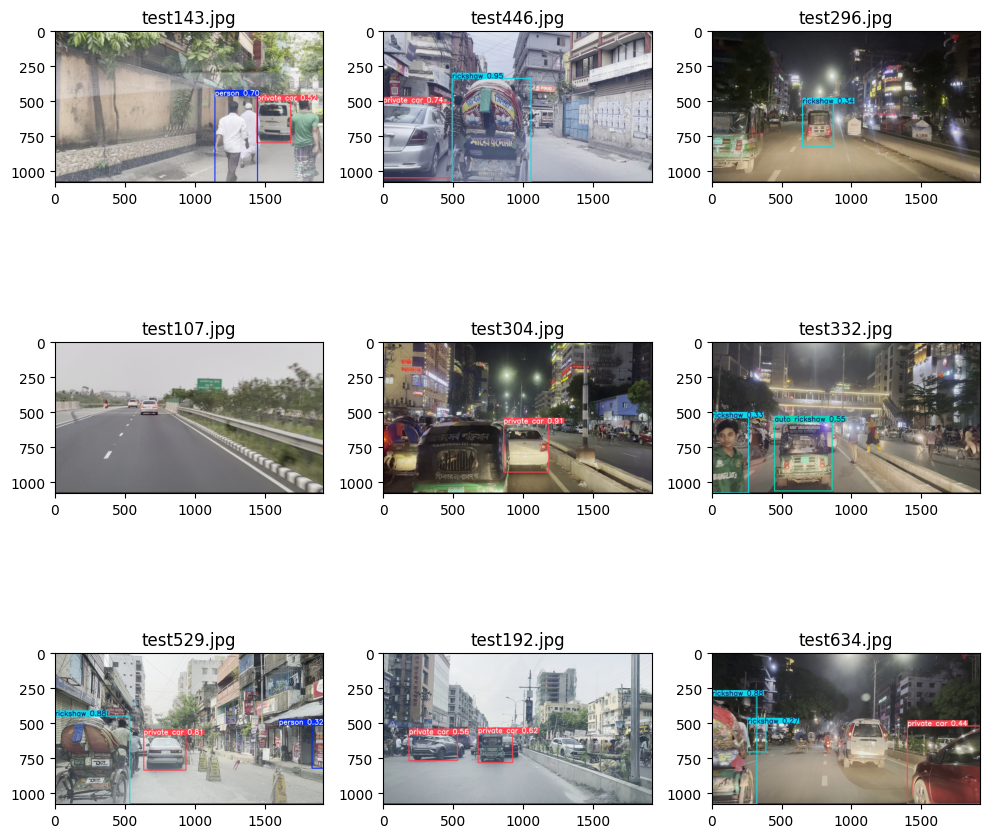

In [18]:
show_img_matrix(img_test[0:9], show_axis=True)